In [1]:
# HIDDEN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

sns.set()

In [2]:
# HIDDEN
markers = {'triangle':['^', sns.color_palette()[0]], 
           'square':['s', sns.color_palette()[1]],
           'circle':['o', sns.color_palette()[2]]}

def plot_binary(data, label):
    data_copy = data.copy()
    data_copy['$y$ == ' + label] = (data_copy['$y$'] == label).astype('category')
    
    sns.lmplot('$x_1$', '$x_2$', data=data_copy, hue='$y$ == ' + label, hue_order=[True, False], 
               markers=[markers[label][0], 'x'], palette=[markers[label][1], 'gray'],
               fit_reg=False)
    plt.xlim(1.0, 4.0)
    plt.ylim(1.0, 4.0);

### (outline)

- What is multiclass classification
    - More than 2 labels that can be classified; versus a binary classification which is restricted to 2 labels
- A situation where multiclass classification might be used
    - Preferably come up with an example in lebron.csv, but might have to use a different data set
- OvO vs OvR
    - In logistic regression, multiclass classification comes down to a bunch of binary problems
    - OvO: Fit a binary classification problem to each pair of classes, then vote for class that wins the most "head-to-head" classifications
    - OvR/OvA: Fit a binary classification problem for each class versus the rest of the classes; result is class that has the highest probability
- Example walking through multiclass? sklearn's logistic regression supports OvR out of the box.
- Multilabel: More than one classification problem (e.g. a document can be positive/negative, religion/not religion, political/apolitical, etc.)

## Multiclass Classification

So far we have discussed binary classification, in which our classifier determines whether an observation is part of the positive class (e.g. an email is classified as spam) or the negative class (e.g. an email is not spam). However, many data science problems involve **multiclass classification**, in which we would like to classify observations as one of several different classes. For example, we may be interested in classifying emails into folders such as Family, Friends, Work, and Promotions. To solve these types of problems, we use a new method called **one-vs-rest (OvR) classification**.

### One-Vs-Rest Classification

In OvR classification (also known as one-vs-all, or OvA), we decompose a multiclass classification problem into several different binary classification problems. For example, we might observe training data as shown below:

In [3]:
# HIDDEN
shapes = pd.DataFrame(
    [[1.3, 3.6, 'triangle'], [1.6, 3.2, 'triangle'], [1.8, 3.8, 'triangle'],
     [2.0, 1.2, 'square'], [2.2, 1.9, 'square'], [2.6, 1.4, 'square'],
     [3.2, 2.9, 'circle'], [3.5, 2.2, 'circle'], [3.9, 2.5, 'circle']],
    columns=['$x_1$', '$x_2$', '$y$']
)

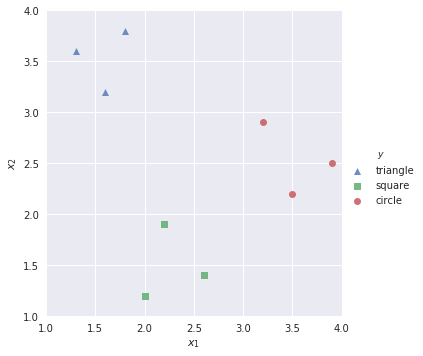

In [4]:
sns.lmplot('$x_1$', '$x_2$', data=shapes, hue='$y$', markers=['^', 's', 'o'], fit_reg=False)
plt.xlim(1.0, 4.0)
plt.ylim(1.0, 4.0);

Our goal is to build a multiclass classifier that labels observations as `triangle`, `square`, or `circle` given values for $x_1$ and $x_2$. First, we want to build a binary classifier that predicts observations as `triangle`/not `triangle`:

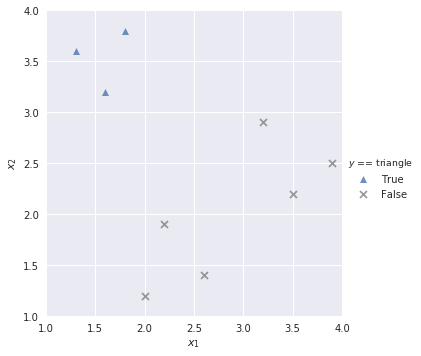

In [5]:
plot_binary(shapes, 'triangle')

Similarly, we build binary classifiers for the remaining classes:

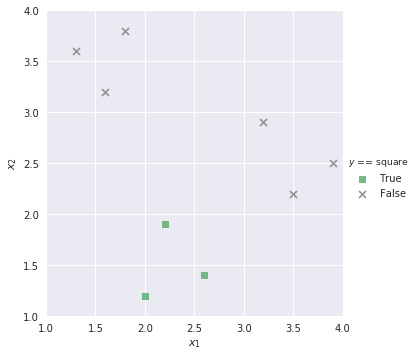

In [6]:
plot_binary(shapes, 'square')

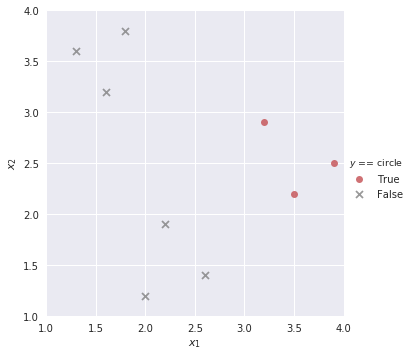

In [7]:
plot_binary(shapes, 'circle')

We know that the output of the sigmoid function in logistic regression is a probability value from 0 to 1. Then to solve our multiclass classification task, we find the probability of the positive class in each binary classifier and select the class that outputs the highest positive class probability. For example, if we have a new observation with the following values:

$x_1$ | $x_2$
---   | ---
3.2   | 2.5

Then our multiclass classifier would fit three binary classifiers to each of the labels of `triangle`, `square`, and `circle`. We extract the positive class probability of each of the three classifiers:

In [8]:
# HIDDEN
lr_triangle = LogisticRegression(random_state=42)
lr_triangle.fit(shapes[['$x_1$', '$x_2$']], shapes['$y$'] == 'triangle')
proba_triangle = lr_triangle.predict_proba([[3.2, 2.5]])[0][1]

lr_square = LogisticRegression(random_state=42)
lr_square.fit(shapes[['$x_1$', '$x_2$']], shapes['$y$'] == 'square')
proba_square = lr_square.predict_proba([[3.2, 2.5]])[0][1]

lr_circle = LogisticRegression(random_state=42)
lr_circle.fit(shapes[['$x_1$', '$x_2$']], shapes['$y$'] == 'circle')
proba_circle = lr_circle.predict_proba([[3.2, 2.5]])[0][1]

print('Triangle:', proba_triangle)
print('Square:', proba_square)
print('Circle:', proba_circle)

Triangle: 0.1457476378273223
Square: 0.28507914730638007
Circle: 0.49761172107185986


triangle | square   | circle
---      | ---      | ---
0.145748 | 0.285079 | 0.497612

Since the positive class probability of `circle` is the greatest of the three, our multiclass classifier predicts that the observation is a `circle`.

## Case Study: Iris dataset

The [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris) is a famous dataset that is often used in data science to explore machine learning concepts. There are three classes, each representing a type of Iris plant:
- Iris-setosa (represented in the dataset by `0`)
- Iris-versicolour (`1`)
- Iris-virginica (`2`)

There are four features available in the dataset:
- Sepal length (cm)
- Sepal width (cm)
- Petal length (cm)
- Petal width (cm)

![](petal_sepal.png)

We will create a multiclass classifier that predicts the type of Iris plant based on the four features above. First, we read in the data:

In [9]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                  header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
X, y = iris.drop('species', axis=1), iris['species']

In [11]:
# Alternatively, read in from sklearn.datasets
# from sklearn.datasets import load_iris

# X, y = load_iris(return_X_y=True)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

After dividing the dataset into train and test splits, we fit a multiclass classifier to our training data. By default, scikit-learn's `LogisticRegression` sets `multi_class='ovr'`:

In [13]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

We predict on the test data, and use a confusion matrix to evaluate the results:

In [14]:
# to-do: add x-axis, y-axis labels to confusion matrix
y_pred = lr.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[19,  0,  0],
       [ 0, 15,  2],
       [ 0,  0, 17]])

The confusion matrix shows that our classifier misclassified two `Iris-versicolour` observations as `Iris-virginica`. In the real world, certain misclassifications can be more common than others. Confusion matrices are valuable because they help us identify where our classifier struggles, and thus provides insight on what kind of features we may need to extract in order to improve the classifier.

## Multilabel Classification

Another type of classification problem is **multilabel classification**, in which each observation can have multiple labels. An example would be a document classification system: a document can be classified as having positive or negative sentiments, but it can also be distinguished between religious/nonreligious or political/apolitical. Multilabel problems can also be multiclass; we may want our document classification system to distinguish between a list of genres, as well as identify the language that the document is written in. 

Because each set of labels in a multiclass classification is mutually exclusive, each problem can be solved independently of the others. We can then combine the outputs so that every observation is assigned a set of classification labels.

## Summary

(to-do)